<a href="https://colab.research.google.com/github/magda-moreno/something/blob/main/Lab10_Air_Quality_Fit_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 10

## Outline

Repeat exercises from Lab 9, but with the *Air Quality Daily AQI* dataset.

Pull the latest "Daily AQI by County" file from this link: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI

Your target variable is *CATEGORY*, indicating if the air is healthy.  You can focus on either the entire country, split the country in regions, or focus on just one area (ex. Utah).   You can reduce noise by aggregating the data to the month of season level.   

Can you predict the category based on the location and time of year?  

The AQI is divided into six categories:

*Air Quality Index*

|(AQI) Values	|Levels of Health Concern	        |
|---------------|--------|
|0-50	        |Good	 |
|51-100	        |Moderate	 |
|101-150	    |Unhealthy for Sensitive Groups	|
|151 to 200	    |Unhealthy	 |
|201 to 300	    |Very Unhealthy	 |
|301 to 500	    |Hazardous	 |

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab10_air_quality_fit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier, export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the air quality dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [3]:
df = pd.read_csv (r'/content/gdrive/MyDrive/IS 4487/daily_aqi_by_county_2023.csv')

In [4]:
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2023-01-10,35,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2023-01-11,28,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2023-01-12,23,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2023-01-13,18,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2023-01-14,20,Good,PM2.5,01-003-0010,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185017 entries, 0 to 185016
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 185017 non-null  object
 1   county Name                185017 non-null  object
 2   State Code                 185017 non-null  int64 
 3   County Code                185017 non-null  int64 
 4   Date                       185017 non-null  object
 5   AQI                        185017 non-null  int64 
 6   Category                   185017 non-null  object
 7   Defining Parameter         185017 non-null  object
 8   Defining Site              185017 non-null  object
 9   Number of Sites Reporting  185017 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 14.1+ MB


In [6]:
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,185017.000000,185017.000000,185017.000000,185017.000000
mean,29.936773,81.188415,43.498397,1.878595
std,15.904884,93.001539,23.905791,2.273400
min,1.000000,1.000000,0.000000,1.000000
25%,17.000000,23.000000,31.000000,1.000000
50%,30.000000,59.000000,41.000000,1.000000
75%,42.000000,107.000000,50.000000,2.000000
max,80.000000,810.000000,1695.000000,33.000000


## Prepare Data

➡️ Assignment Tasks
- Create one dummy variable (true/false) for each of the Defining Parameter values    
- Create variables for month and season
- Perform any other data cleanup needed (remove outliers, nulls, etc.)
- Select the data you would like to use in the model.  If you aggregate data, you will have to decide whether to use the min, max or mean value for AQI

In [7]:
#create columns
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Year
0,Alabama,Baldwin,1,3,2023-01-10,35,Good,PM2.5,01-003-0010,1,1,2023
1,Alabama,Baldwin,1,3,2023-01-11,28,Good,PM2.5,01-003-0010,1,1,2023
2,Alabama,Baldwin,1,3,2023-01-12,23,Good,PM2.5,01-003-0010,1,1,2023
3,Alabama,Baldwin,1,3,2023-01-13,18,Good,PM2.5,01-003-0010,1,1,2023
4,Alabama,Baldwin,1,3,2023-01-14,20,Good,PM2.5,01-003-0010,1,1,2023


In [8]:
df['Season'] = df['Date'].dt.month % 12 // 3 + 1

seasons = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(seasons)
df.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Year,Season
0,Alabama,Baldwin,1,3,2023-01-10,35,Good,PM2.5,01-003-0010,1,1,2023,Winter
1,Alabama,Baldwin,1,3,2023-01-11,28,Good,PM2.5,01-003-0010,1,1,2023,Winter
2,Alabama,Baldwin,1,3,2023-01-12,23,Good,PM2.5,01-003-0010,1,1,2023,Winter
3,Alabama,Baldwin,1,3,2023-01-13,18,Good,PM2.5,01-003-0010,1,1,2023,Winter
4,Alabama,Baldwin,1,3,2023-01-14,20,Good,PM2.5,01-003-0010,1,1,2023,Winter


In [9]:
df = df[df['State Name']== 'Utah']
df.head(10)

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting,Month,Year,Season
160777,Utah,Box Elder,49,3,2023-01-01,35,Good,Ozone,49-003-7001,1,1,2023,Winter
160778,Utah,Box Elder,49,3,2023-01-02,34,Good,Ozone,49-003-7001,1,1,2023,Winter
160779,Utah,Box Elder,49,3,2023-01-03,34,Good,Ozone,49-003-7001,1,1,2023,Winter
160780,Utah,Box Elder,49,3,2023-01-04,31,Good,Ozone,49-003-7001,1,1,2023,Winter
160781,Utah,Box Elder,49,3,2023-01-05,27,Good,Ozone,49-003-7001,1,1,2023,Winter
160782,Utah,Box Elder,49,3,2023-01-06,29,Good,Ozone,49-003-7001,1,1,2023,Winter
160783,Utah,Box Elder,49,3,2023-01-07,28,Good,Ozone,49-003-7001,1,1,2023,Winter
160784,Utah,Box Elder,49,3,2023-01-08,27,Good,Ozone,49-003-7001,1,1,2023,Winter
160785,Utah,Box Elder,49,3,2023-01-09,27,Good,Ozone,49-003-7001,1,1,2023,Winter
160786,Utah,Box Elder,49,3,2023-01-10,35,Good,Ozone,49-003-7001,1,1,2023,Winter


In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3546 entries, 160777 to 164322
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   State Name                 3546 non-null   object        
 1   county Name                3546 non-null   object        
 2   State Code                 3546 non-null   int64         
 3   County Code                3546 non-null   int64         
 4   Date                       3546 non-null   datetime64[ns]
 5   AQI                        3546 non-null   int64         
 6   Category                   3546 non-null   object        
 7   Defining Parameter         3546 non-null   object        
 8   Defining Site              3546 non-null   object        
 9   Number of Sites Reporting  3546 non-null   int64         
 10  Month                      3546 non-null   int64         
 11  Year                       3546 non-null   int64         
 12 

<ipython-input-10-9174d45f281f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [11]:
#df = df.drop(columns=[''])

In [12]:
#select final columns for use

## Create Regression

➡️ Assignment Tasks
- Create a simple linear regression to predict AQI based on as many variables as you can use or derive.
- Visualize the regression

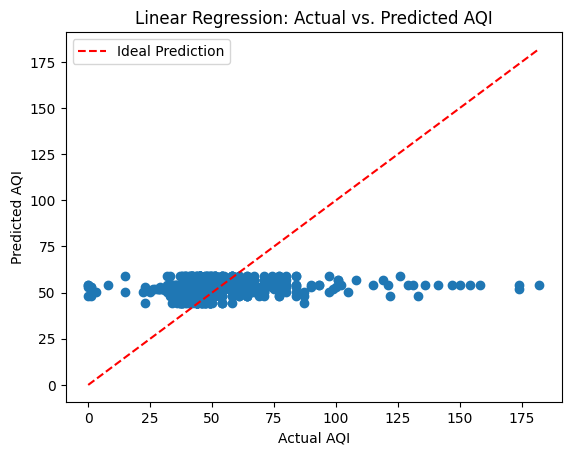

In [13]:
df = pd.get_dummies(df, columns=['State Name', 'Season'], drop_first=True)
#create regression
X = df[['Month'] + [col for col in df.columns if col.startswith('State_') or col.startswith('Season_')]]
y = df['AQI']

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model (optional)
# Calculate metrics like mean squared error (MSE) or R-squared

# Visualize the regression
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal Prediction')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Linear Regression: Actual vs. Predicted AQI')
plt.legend()
plt.show()

In [14]:
#visual

## Make a prediction

➡️ Assignment Tasks
- What would you predict the average AQI to be in the month of January?  

In [15]:
# Encode the month "January" into numerical format
# Create a feature vector with all zeros except for the January column, which is set to 1
january_feature = [1] + [0] * (len(X.columns) - 1)  # Assuming X.columns represents all feature columns

# Make a prediction for January's average AQI
predicted_aqi_january = model.predict([january_feature])

print(f"Predicted average AQI in January: {predicted_aqi_january[0]:.2f}")


Predicted average AQI in January: 25.18


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## OPTIONAL: Compare Air Quality

➡️ Assignment Tasks
- Download the data from a year 20 years prior, using this website: https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI
- Append the new data to the previous dataframe
- Use the year as a variable in your regression.  Is year a significant factor in predicting AQI?